# Handwritten Digit Recognition using CNN in Keras

### Description of MNIST Handwritten DIgit Recognition Problem

Each image is a 28 by 28 pixel square (784 pixels total). A standard spit of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

### Loading the MNIST dataset in Keras

Using TensorFlow backend.


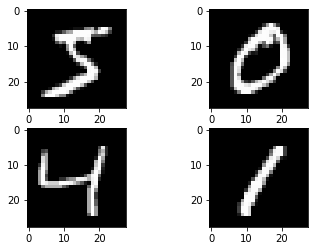

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
#load the MNIST dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#show the plot
plt.show()


### Baseline Model with Multi-Layer Perceptrons


In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

60000
28
28


In [5]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test =X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [6]:
#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.2783 - acc: 0.9212 - val_loss: 0.1416 - val_acc: 0.9567
Epoch 2/10
 - 11s - loss: 0.1118 - acc: 0.9676 - val_loss: 0.0924 - val_acc: 0.9698
Epoch 3/10
 - 11s - loss: 0.0720 - acc: 0.9795 - val_loss: 0.0782 - val_acc: 0.9769
Epoch 4/10
 - 11s - loss: 0.0505 - acc: 0.9858 - val_loss: 0.0750 - val_acc: 0.9769
Epoch 5/10
 - 11s - loss: 0.0374 - acc: 0.9891 - val_loss: 0.0680 - val_acc: 0.9790
Epoch 6/10
 - 12s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0632 - val_acc: 0.9802
Epoch 7/10
 - 11s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0633 - val_acc: 0.9803
Epoch 8/10
 - 11s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0620 - val_acc: 0.9806
Epoch 9/10
 - 11s - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0574 - val_acc: 0.9820
Epoch 10/10
 - 11s - loss: 0.0081 - acc: 0.9986 - val_loss: 0.0609 - val_a

## Simple Convolution Neural Network for MNIST

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)                 

In [3]:
#load data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
#reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


In [4]:
#normalise inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [5]:
def baseline_model():
    #create model
    model = Sequential()
    model.add(Conv2D(32,(5,5), input_shape=(1,28,28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [6]:
#build the model
model = baseline_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs =10, batch_size = 200, verbose =1)
#final evaluation of the model
scores = model.evaluate(X_test,y_test,verbose=0)
print("CNN Error: %.2%%"%(100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2242 - acc: 0.9362 - val_loss: 0.0800 - val_acc: 0.9749
Epoch 2/10
 8000/60000 [===>..........................] - ETA: 1:18 - loss: 0.0806 - acc: 0.9771

KeyboardInterrupt: 

## Larger Convolutional Neural Network for MNIST

In [29]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [30]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
26200/60000 [============>.................] - ETA: 48s - loss: 0.6885 - acc: 0.7895

KeyboardInterrupt: 